In [41]:
import pandas as pd
data= pd.read_csv('data/인구현황.csv')

data.head()

data = data[1:]

In [43]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
print('matplotlib ', matplotlib.__version__)
print('seaborn ', sns.__version__)

[(font.name, font.fname) for font in fm.fontManager.ttflist if 'Mal' in font.name]

font_path = 'C:\\Windows\\Fonts\\malgun.ttf'

font_prop = fm.FontProperties(fname = font_path).get_name()
print(font_prop)
matplotlib.rc('font',family =font_prop)

matplotlib  3.8.4
seaborn  0.13.2
Malgun Gothic


1. 지역별 총인구수 Top5

In [26]:
sorted_data_total = data[['행정기관','총인구수']].sort_values(by='총인구수',ascending=False)
sorted_data_total.head()

,행정기관,총인구수
9,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
16,경상남도,3228380
4,인천광역시,3021010


1-1. 지역별 총인구수 plot

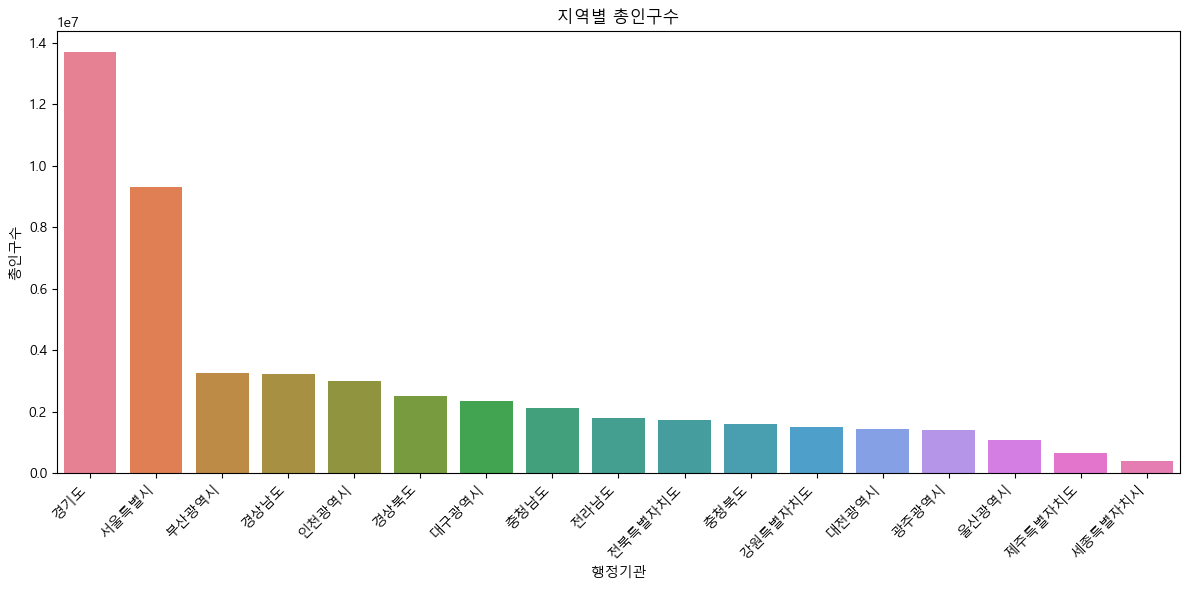

In [53]:
plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_data_total, x="행정기관" , y='총인구수',hue='행정기관')

plt.title("지역별 총인구수")
plt.ylabel("총인구수")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

2. 세대당 인구수 높은 지역 Top5

In [31]:
sorted_data_home =  data[['행정기관','세대당 인구']].sort_values(by='세대당 인구',ascending=False).reset_index(drop=True)
sorted_data_home.head()


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14


2-1. 지역별 세대당 인구 Plot

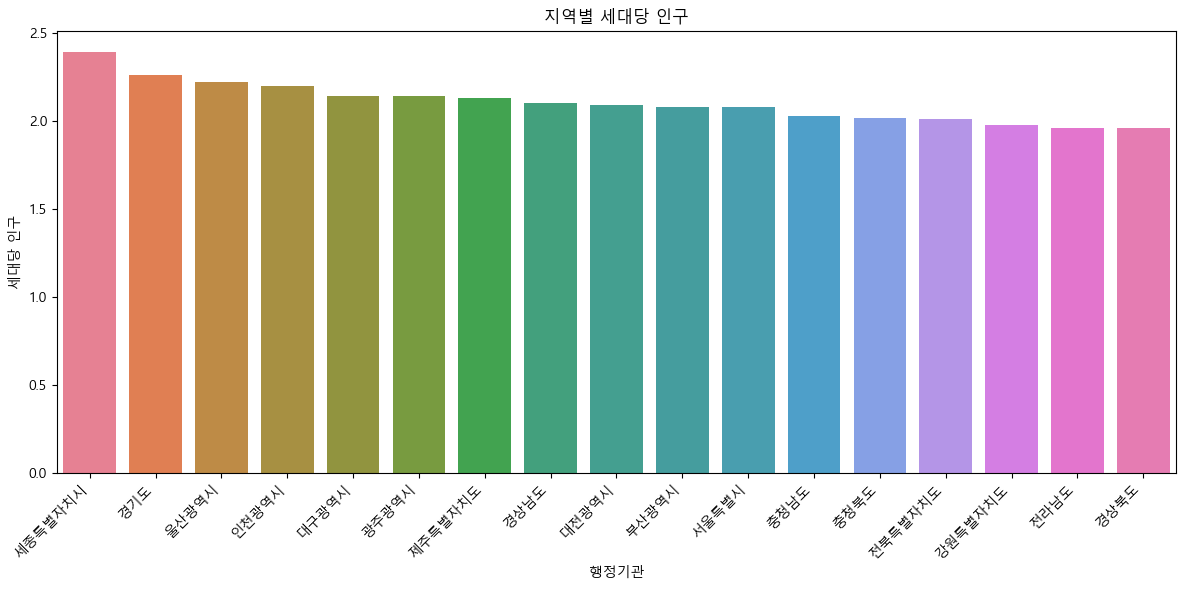

In [54]:
plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_data_home, x="행정기관" , y='세대당 인구',hue='행정기관')

plt.title("지역별 세대당 인구")
plt.xlabel("행정기관")
plt.ylabel("세대당 인구")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

3. 남녀 비율 분석

In [33]:
sorted_data_gender = data[["행정기관", "남여 비율"]].sort_values(by="남여 비율", ascending=False).reset_index(drop=True)
sorted_data_gender.head()

,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02


3-1. 남녀 비율 분석 Plot

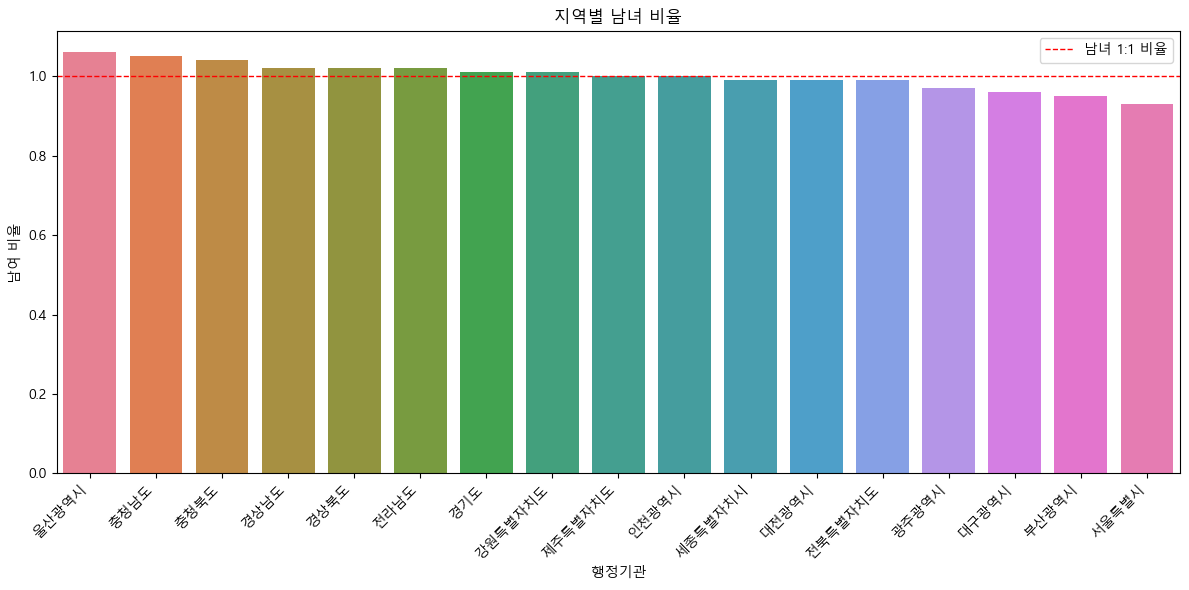

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_data_gender, x="행정기관" , y='남여 비율',hue='행정기관')
plt.axhline(1.0, color='red', linestyle='--', linewidth=1, label='남녀 1:1 비율')
plt.title("지역별 남녀 비율")
plt.xlabel("행정기관")
plt.ylabel("남여 비율")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.legend()
plt.show()

4. 남자초과 / 여자초과 분석

In [59]:
gender_data = data[['행정기관','남여 비율']].copy()
gender_data["남초여초"] = "여초"
gender_data.loc[gender_data["남여 비율"] >= 1, "남초여초"] = "남초"
gender_data

,행정기관,남여 비율,남초여초
1,서울특별시,0.93,여초
2,부산광역시,0.95,여초
3,대구광역시,0.96,여초
4,인천광역시,1.00,남초
5,광주광역시,0.97,여초
6,대전광역시,0.99,여초
7,울산광역시,1.06,남초
8,세종특별자치시,0.99,여초
9,경기도,1.01,남초
10,강원특별자치도,1.01,남초


5. 세대당 인구 평균보다 높은 지역

In [60]:
higher_than_mean = data[data["세대당 인구"] > data["세대당 인구"].mean()][["행정기관", "세대당 인구"]].sort_values(by="세대당 인구", ascending=False).reset_index(drop=True)
higher_than_mean

,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14
5,광주광역시,2.14
6,제주특별자치도,2.13


5-1.   남초 vs 여초 개수 Plot / 지역별 세대수 Plot

Text(0.5, 1.0, '지역별 세대수')

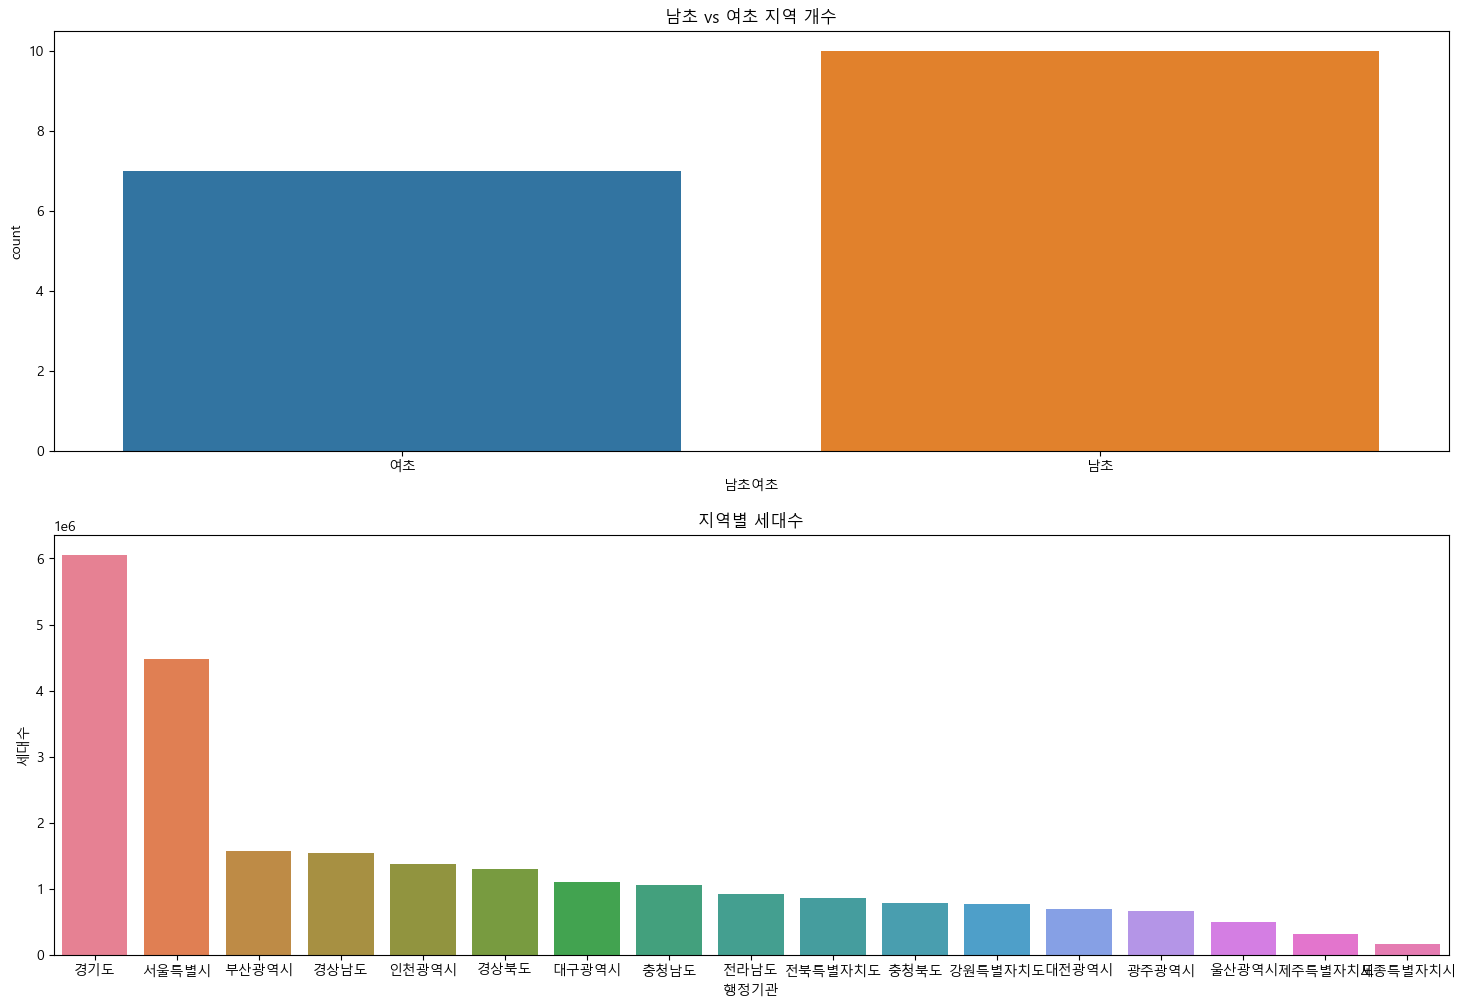

In [69]:
figure,(ax1,ax2) = plt.subplots(nrows=2,ncols=1)
figure.set_size_inches(18,12)

sns.countplot(data=gender_data, x = '남초여초', ax=ax1, hue = '남초여초')
ax1.set_title("남초 vs 여초 지역 개수")
sns.barplot(data=data.sort_values(by='세대수',ascending=False), x= '행정기관',y='세대수',hue='행정기관',ax=ax2)
ax2.set_title("지역별 세대수")

6. 남자 인구 vs 여자 인구 비교 Plot

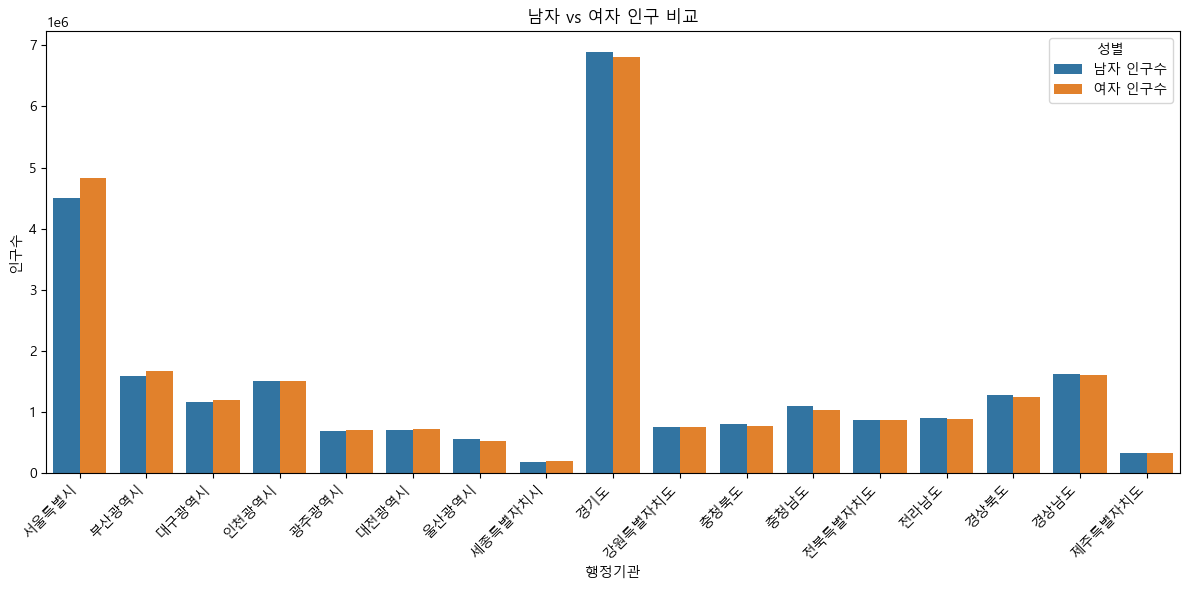

In [74]:
df_melted = data.melt(
    id_vars="행정기관",
    value_vars=["남자 인구수", "여자 인구수"],
    var_name="성별",
    value_name="인구수"
)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x="행정기관", y="인구수", hue="성별")

plt.title("남자 vs 여자 인구 비교")
plt.xlabel("행정기관")
plt.ylabel("인구수")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()